In [2]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.fft import fft, fftshift, fftfreq, ifft, ifftshift
from scipy.signal.windows import kaiser


def rect(x):
    return np.where(np.abs(x) <= 0.5, 1, 0)

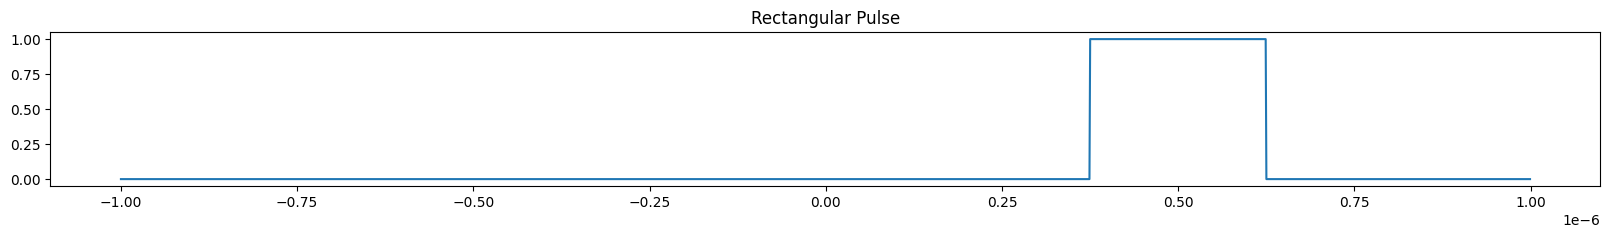

In [3]:
t = np.arange(-1e-6, 1e-6, 1e-9)  # Time vector
t0 = 0.5e-6  # Pulse center
T = 0.25e-6  # Pulse width

plt.figure(figsize=(20, 2))
plt.plot(t, rect((t - t0) / T))
plt.title("Rectangular Pulse")
plt.show()

In [182]:

# --- Parameters ---
fs = 1e9  # Sampling frequency
t = np.arange(-1e-6, 1e-6, 1 / fs)  # Time vector
T = 0.5e-6  # Pulse width
t0 = 0  # Pulse center
tc = 0  # Chirp center
K = 1.5e14  # Chirp rate

# --- LFM Signal in time domain ---
s_ref_t = rect((t - t0) / T) * np.exp(1j * np.pi * K * (t - t0 - tc) ** 2)

# --- LFM Signal in frequency domain ---
Nfft = 5*2048  # FFT length for zero-padding
f = fftshift(fftfreq(Nfft, 1 / fs))  # Frequency vector for Nfft
S_ref_t = fftshift(fft(s_ref_t, Nfft))  # Zero-padded spectrum

# --- Matched Filter in frequency domain ---
H_ref_f = np.conj(S_ref_t)

wk = kaiser(len(t), beta=2.5)
h = wk * np.exp(1j * np.pi * K * (t - tc) ** 2)
H_2_f = np.conj(fftshift(fft(h, Nfft)))
f_2 = fftshift(fftfreq(Nfft, 1 / fs))


# --- Matched Signal ---
S_mat_f = S_ref_t * H_2_f
s_mat_t = ifftshift(ifft(S_mat_f))

t_mat = np.arange(-len(s_mat_t) / (2 * fs), len(s_mat_t) / (2 * fs), 1 / fs)

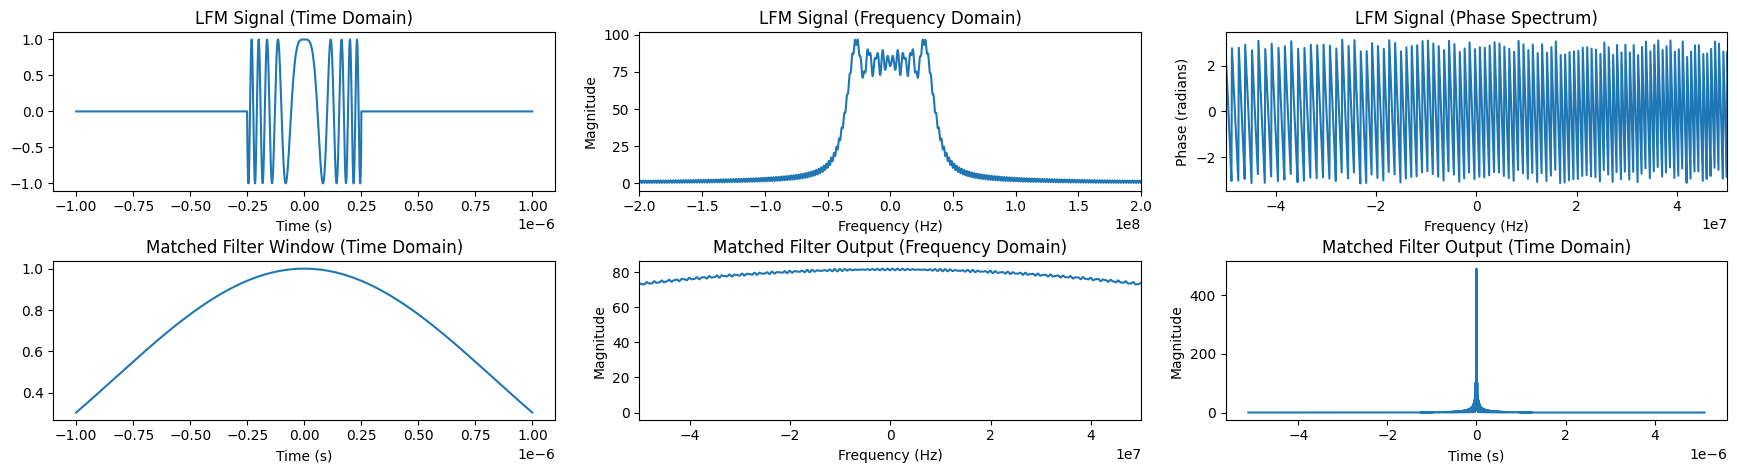

In [183]:
fig, axs = plt.subplots(2, 3, figsize=(18, 5))
fig.tight_layout(pad=3.0)
axs = axs.ravel()

# Use t and s_ref_t with matching shapes
axs[0].plot(t, s_ref_t.real)
axs[0].set_title("LFM Signal (Time Domain)")
axs[0].set_xlabel("Time (s)")

# Use f and S_ref_t with matching shapes
axs[1].plot(f, np.abs(S_ref_t))
axs[1].set_title("LFM Signal (Frequency Domain)")
axs[1].set_xlim([-20e7, 20e7])
axs[1].set_xlabel("Frequency (Hz)")
axs[1].set_ylabel("Magnitude")

axs[2].plot(f, np.angle(S_ref_t))
axs[2].set_title("LFM Signal (Phase Spectrum)")
axs[2].set_xlim([-5e7, 5e7])
axs[2].set_xlabel("Frequency (Hz)")
axs[2].set_ylabel("Phase (radians)")

# Use t and wk with matching shapes
axs[3].plot(t, np.abs(wk))
axs[3].set_title("Matched Filter Window (Time Domain)")
axs[3].set_xlabel("Time (s)")

# Use f and H3_f with matching shapes (since f_3 and H3_f are both (2048,))
axs[4].plot(f, np.abs(H_2_f))
axs[4].set_title("Matched Filter Output (Frequency Domain)")
axs[4].set_xlim([-5e7, 5e7])
axs[4].set_xlabel("Frequency (Hz)")
axs[4].set_ylabel("Magnitude")

# Use t and s_mat_t with matching shapes
axs[5].plot(t_mat, np.abs(s_mat_t))
axs[5].set_title("Matched Filter Output (Time Domain)")
axs[5].set_xlabel("Time (s)")
axs[5].set_ylabel("Magnitude")

plt.show()

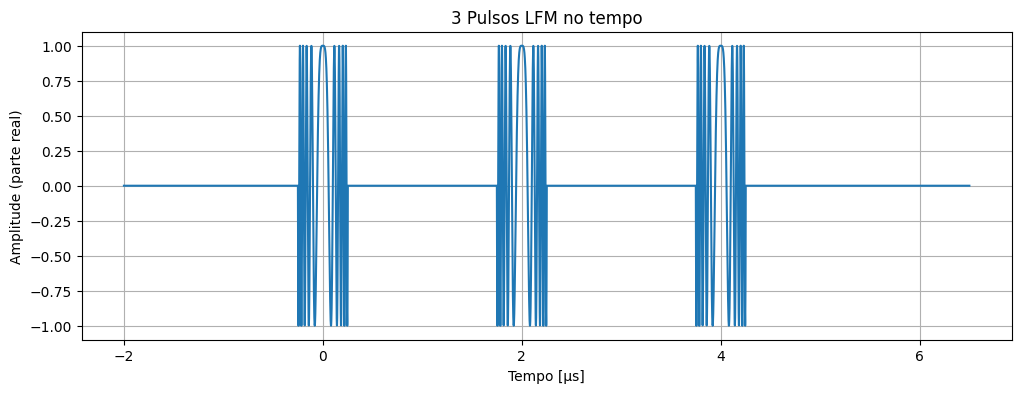

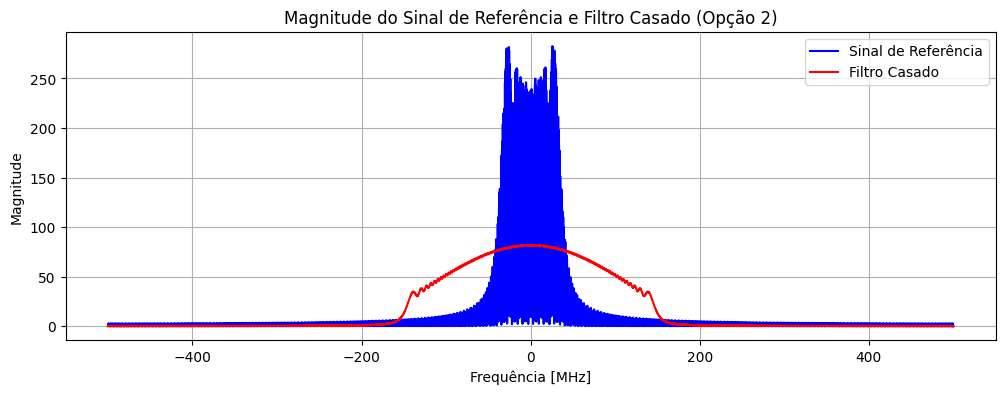

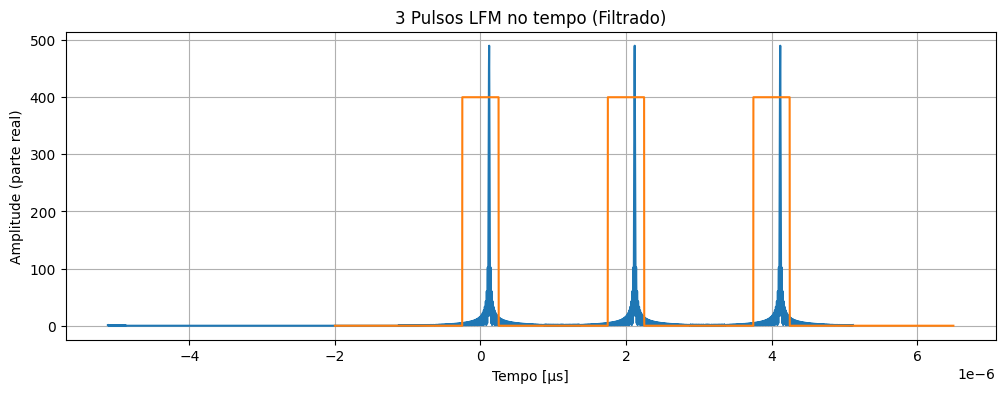

In [155]:
# ...existing code...

from scipy.signal.windows import kaiser

# Parâmetros
fs = 1e9  # Frequência de amostragem
T = 0.5e-6  # Largura do pulso
T_A = 2e-6  # Intervalo entre pulsos
K = 1.5e14  # Chirp rate
beta = 2.5  # Parâmetro da janela de Kaiser
N = 5*2048


# Geração do vetor de tempo para 3 pulsos separados por T_A
n_pulses = 3
t_total = (n_pulses - 1) * T_A + T  # tempo total do sinal
t = np.arange(-T_A, t_total + T_A, 1 / fs)  # vetor de tempo com folga

# Centro de cada pulso
centros = np.arange(0, n_pulses) * T_A

# Sinal: soma de 3 pulsos LFM separados
s_ref_t = np.zeros_like(t, dtype=complex)
for t0 in centros:
    s_ref_t += rect((t - t0) / T) * np.exp(1j * np.pi * K * (t - t0) ** 2)

# Espectro (usar Nfft para garantir o mesmo tamanho)
f = fftshift(fftfreq(Nfft, 1 / fs))
S_ref_t = fftshift(fft(s_ref_t, Nfft))

# Número de elementos no comprimento do pulso
Comp_T = int(np.ceil(T * fs))

# --- Filtro casado diretamente no domínio da frequência (Opção 3) ---
# Janela de Kaiser no tempo


# Aplicação do filtro casado
S_mat_f = S_ref_t * H_2_f
s_mat_t = ifft(ifftshift(S_mat_f))
t_mat = -(np.arange(len(s_mat_t)) - len(s_mat_t) / 2) / fs
# Plot
plt.figure(figsize=(12, 4))
plt.plot(t * 1e6, np.real(s_ref_t))
plt.title("3 Pulsos LFM no tempo")
plt.xlabel("Tempo [μs]")
plt.ylabel("Amplitude (parte real)")
plt.grid()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(f / 1e6, np.abs(S_ref_t), label="Sinal de Referência", color='b')
plt.plot(f / 1e6, np.abs(H_2_f), label="Filtro Casado", color='r')
plt.title("Magnitude do Sinal de Referência e Filtro Casado (Opção 2)")
plt.xlabel("Frequência [MHz]")
plt.ylabel("Magnitude")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(t_mat, np.abs(s_mat_t))
plt.plot(t, np.abs(s_ref_t)*400)
plt.title("3 Pulsos LFM no tempo (Filtrado)")
plt.xlabel("Tempo [μs]")
plt.ylabel("Amplitude (parte real)")
plt.grid()
plt.show()


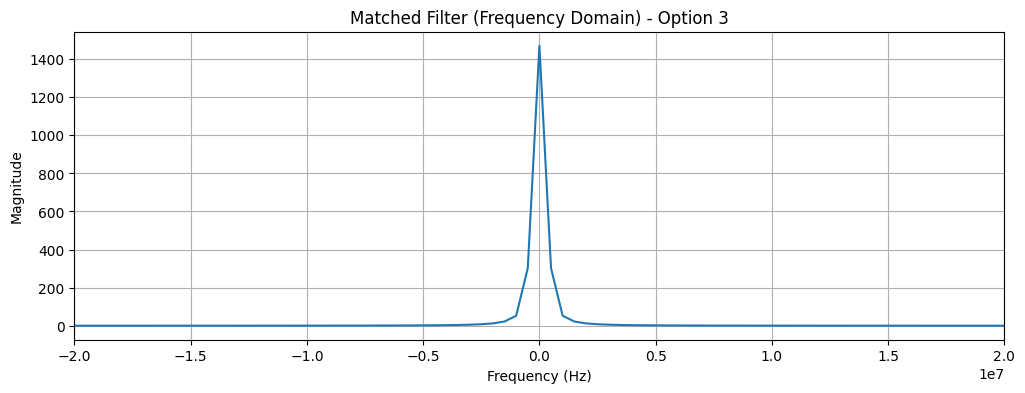

In [196]:

# Gerar Filtro casado opção 3


fs = 1e9  # Sampling frequency
t = np.arange(-1e-6, 1e-6, 1 / fs)  # Time vector
T = 0.5e-6  # Pulse width
t0 = 0  # Pulse center
tc = 0  # Chirp center
K = 1.5e14  # Chirp rate

# --- LFM Signal in time domain ---
s_ref_t = rect((t - t0) / T) * np.exp(1j * np.pi * K * (t - t0 - tc) ** 2)

# --- LFM Signal in frequency domain ---
f = fftshift(fftfreq(len(t), 1 / fs))  # Frequency vector for Nfft
S_ref_t = fftshift(fft(s_ref_t))  # Zero-padded spectrum

# --- Matched Filter in frequency domain ---
wk = kaiser(len(t), beta=2.5)
Wk = fftshift(fft(wk, len(t)))
H_3_f = Wk * np.exp(1j * np.pi * f ** 2/K)

plt.figure(figsize=(12, 4))
plt.plot(f, np.abs(H_3_f))
plt.xlim([-2e7, 2e7])
plt.title("Matched Filter (Frequency Domain) - Option 3")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()



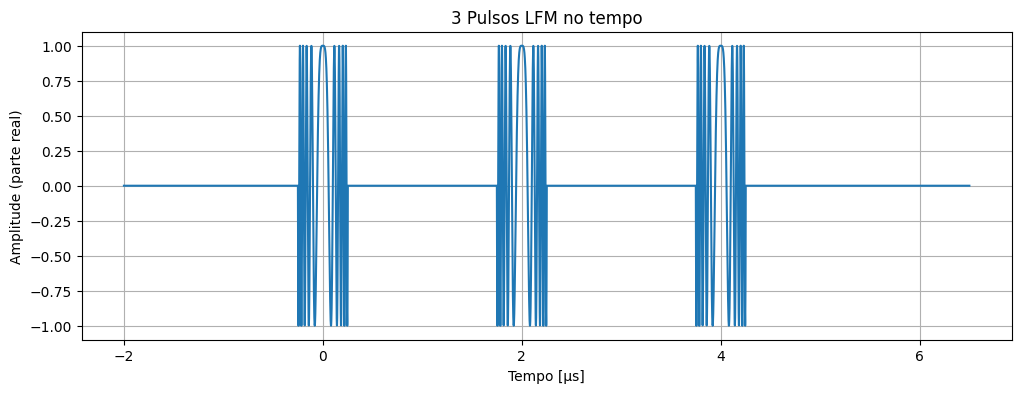

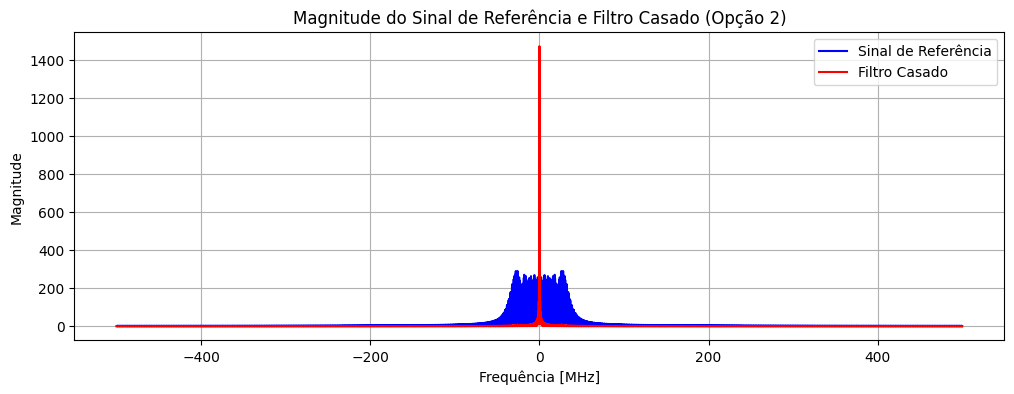

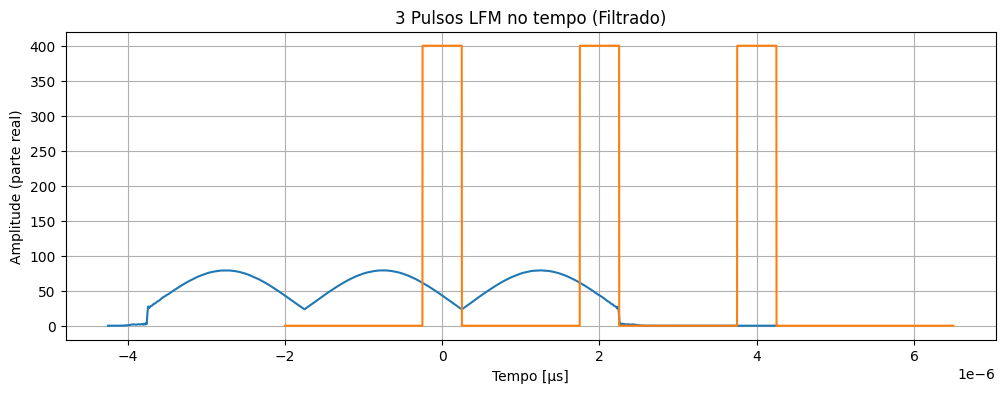

In [187]:
# ...existing code...

from scipy.signal.windows import kaiser

# Parâmetros
fs = 1e9  # Frequência de amostragem
T = 0.5e-6  # Largura do pulso
T_A = 2e-6  # Intervalo entre pulsos
K = 1.5e14  # Chirp rate
beta = 2.5  # Parâmetro da janela de Kaiser
N = 5*2048


# Geração do vetor de tempo para 3 pulsos separados por T_A
n_pulses = 3
t_total = (n_pulses - 1) * T_A + T  # tempo total do sinal
t = np.arange(-T_A, t_total + T_A, 1 / fs)  # vetor de tempo com folga

# Centro de cada pulso
centros = np.arange(0, n_pulses) * T_A

# Sinal: soma de 3 pulsos LFM separados
s_ref_t = np.zeros_like(t, dtype=complex)
for t0 in centros:
    s_ref_t += rect((t - t0) / T) * np.exp(1j * np.pi * K * (t - t0) ** 2)

# Espectro (usar Nfft para garantir o mesmo tamanho)
f = fftshift(fftfreq(len(t), 1 / fs))
S_ref_t = fftshift(fft(s_ref_t, len(t)))

# Número de elementos no comprimento do pulso
Comp_T = int(np.ceil(T * fs))

# --- Filtro casado diretamente no domínio da frequência (Opção 3) ---
# Janela de Kaiser no tempo
target_len = len(S_ref_t)

h = H_3_f
if len(h) != target_len:
    pad_total = target_len - len(h)
    left = pad_total // 2
    right = pad_total - left
    H_3_f = np.pad(h, (left, right), mode='constant', constant_values=0)
# Aplicação do filtro casado
S_mat_f = S_ref_t * H_3_f
s_mat_t = ifft(ifftshift(S_mat_f))
t_mat = -(np.arange(len(s_mat_t)) - len(s_mat_t) / 2) / fs
# Plot
plt.figure(figsize=(12, 4))
plt.plot(t * 1e6, np.real(s_ref_t))
plt.title("3 Pulsos LFM no tempo")
plt.xlabel("Tempo [μs]")
plt.ylabel("Amplitude (parte real)")
plt.grid()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(f / 1e6, np.abs(S_ref_t), label="Sinal de Referência", color='b')
plt.plot(f / 1e6, np.abs(H_3_f), label="Filtro Casado", color='r')
plt.title("Magnitude do Sinal de Referência e Filtro Casado (Opção 2)")
plt.xlabel("Frequência [MHz]")
plt.ylabel("Magnitude")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(t_mat, np.abs(s_mat_t))
plt.plot(t, np.abs(s_ref_t)*400)
plt.title("3 Pulsos LFM no tempo (Filtrado)")
plt.xlabel("Tempo [μs]")
plt.ylabel("Amplitude (parte real)")
plt.grid()
plt.show()


In [6]:
# --- Recieved Signal Parameters ---
t_rec = 0.5e-6
tc_rec = 0.125e-6

# --- Recieved LFM Signal in time domain ---
s_rec_t = rect((t - t_rec) / T) * np.exp(1j * np.pi * K * (t - t_rec - tc_rec) ** 2)
S_rec_t = fftshift(fft(s_rec_t))
S_rec_mat_f = S_rec_t * H_ref_f
s_rec_mat_t = ifftshift(ifft(S_rec_mat_f))

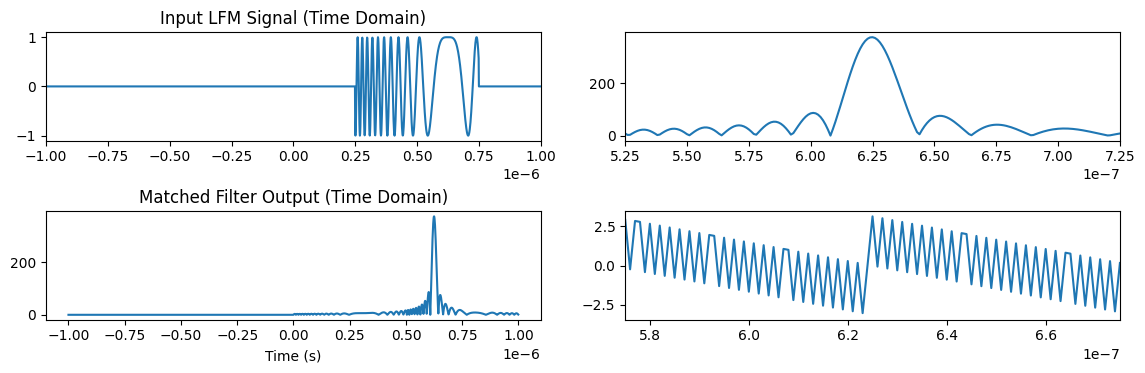

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(12, 4))
fig.tight_layout(pad=3.0)
axs = axs.ravel()

axs[0].plot(t, s_rec_t.real)
axs[0].set_title("Input LFM Signal (Time Domain)")
axs[0].set_xlim([-1e-6, 1e-6])

axs[1].plot(t, np.abs(s_rec_mat_t))
axs[1].set_xlim([(t_rec + tc_rec) - 0.1e-6, (t_rec + tc_rec) + 0.1e-6])

axs[2].plot(t, np.abs(s_rec_mat_t))
axs[2].set_title("Matched Filter Output (Time Domain)")
axs[2].set_xlabel("Time (s)")

axs[3].plot(t, np.angle(s_rec_mat_t))
axs[3].set_xlim([(t_rec + tc_rec) - 0.05e-6, (t_rec + tc_rec) + 0.05e-6])


plt.show()

In [8]:
# --- Parameters ---
beta = 2.5

# --- Kaiser Window ---
wk = kaiser(len(t), beta=beta)

# --- Smoothing Filter ---
ht = wk * np.exp(-1j * 2 * np.pi * K * t**2)
Hf = fftshift(fft(ht))

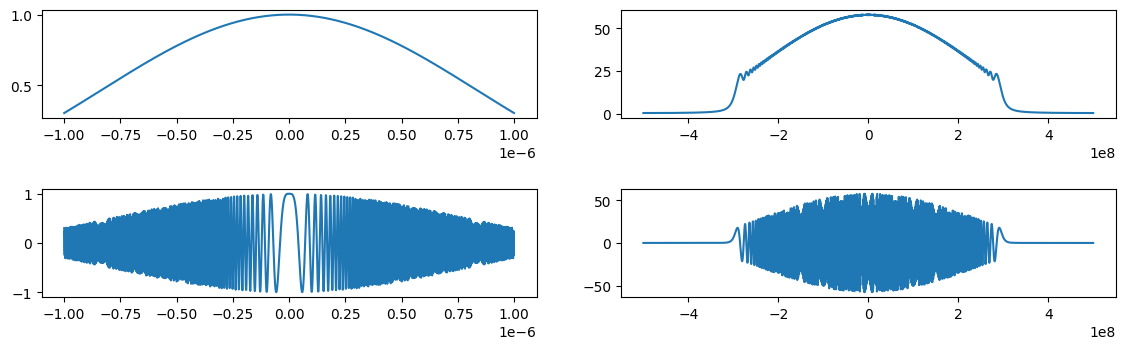

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(12, 4))
fig.tight_layout(pad=3.0)
axs = axs.ravel()

axs[0].plot(t, np.abs(ht))
axs[1].plot(f, np.abs(Hf))
axs[2].plot(t, ht.real)
axs[3].plot(f, Hf.real)

plt.show()

In [10]:
# --- Parameters ---
beta = 2.5  # Kaiser window parameter
gamma_w = 1.18  # Resolution improvement factor
alpha_os = fs / (np.abs(K) * T)  # Oversampling factor

rho = 0.886 * gamma_w / (np.abs(K) * T)

e:\ITA\8sem\ET-291\et-291\.venv\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
e:\ITA\8sem\ET-291\et-291\.venv\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


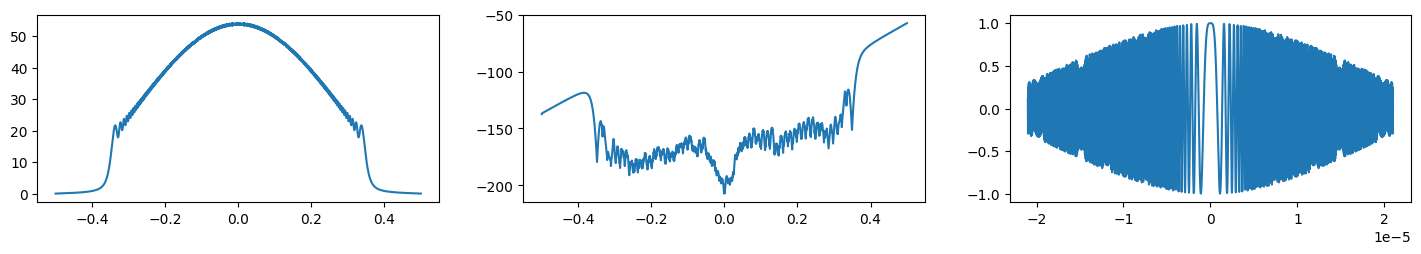

In [11]:
# --- RADARSAT Parameters ---
fs = 18.5e6  # Sampling frequency
dt = 1 / fs  # Sampling period
T = 42e-6  # Chirp duration
K = 0.41e12  # Chirp rate
alpha_os = fs / (np.abs(K) * T)  # Oversampling factor
beta = 2.5  # Roll-off factor for Kaiser window

N = 2048  # Number of samples
t = np.linspace(-T / 2, T / 2, N)  # Time vector
f = fftshift(fftfreq(len(t)))  # Frequency vector

wk = kaiser(N, beta=beta)

h2 = wk * np.exp(+1j * 2 * np.pi * K * t**2)
H2 = fftshift(fft(h2))

fig, axs = plt.subplots(1, 3, figsize=(15, 3))
fig.tight_layout(pad=3.0)
axs = axs.ravel()

axs[0].plot(f, np.abs(H2))
axs[1].plot(f, np.unwrap(np.angle(H2, deg=True)))
axs[2].plot(t, h2)